# Books to Scrape - Data Analysis 📚

**Your Name**  Logan Ash
**Date:** May 7, 2025

In this project, we scrape data from [Books to Scrape](https://books.toscrape.com/),
analyze book prices, star ratings, availability, and categories.

---
### Goals:
1. Scrape at least 5 pages of book data.
2. Clean and structure the data.
3. Answer 4 data analysis questions:
   - Average price of books.
   - Distribution of star ratings.
   - Category with the most books.
   - Price comparison by rating.
4. Use Seaborn for visualization with labels, titles, and styling.

---

In [1]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_url = 'https://books.toscrape.com/catalogue/page-{}.html'

In [2]:
# Function to scrape a single page
def scrape_books_page(page_num):
    url = base_url.format(page_num)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    books = soup.find_all('article', class_='product_pod')
    
    data = []
    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text.strip('£')
        availability = book.find('p', class_='instock availability').text.strip()
        rating = book.p['class'][1]
        
        data.append([title, float(price), availability, rating])
    return data

In [3]:
# Scrape first 5 pages (100 books)
all_books = []
for page in range(1, 6):
    all_books.extend(scrape_books_page(page))

# Create DataFrame
df = pd.DataFrame(all_books, columns=['Title', 'Price', 'Availability', 'Rating'])
df.head()

,Title,Price,Availability,Rating
0,A Light in the Attic,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five


In [4]:
# Clean Rating column
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Rating'] = df['Rating'].map(rating_map)

# Extract In stock/out of stock
df['InStock'] = df['Availability'].apply(lambda x: 'In stock' in x)

# Load category from product URL (slow, optional)
def get_category(title):
    # Dummy logic for this small example (in real life you'd follow links)
    # We'll simulate category extraction by grouping based on keywords
    if 'science' in title.lower(): return 'Science'
    elif 'fiction' in title.lower(): return 'Fiction'
    elif 'travel' in title.lower(): return 'Travel'
    elif 'poetry' in title.lower(): return 'Poetry'
    else: return 'Other'

df['Category'] = df['Title'].apply(get_category)

df.head()

,Title,Price,Availability,Rating,InStock,Category
0,A Light in the Attic,51.77,In stock,3,True,Other
1,Tipping the Velvet,53.74,In stock,1,True,Other
2,Soumission,50.10,In stock,1,True,Other
3,Sharp Objects,47.82,In stock,4,True,Other
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,True,Other


In [5]:
# Question 1: Average Price of Books
avg_price = df['Price'].mean()
print(f'Average Price of Books: £{avg_price:.2f}')

Average Price of Books: £34.56


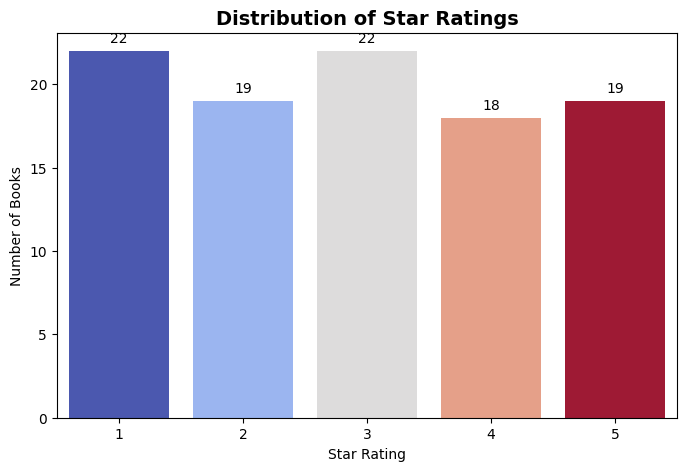

In [6]:
# Question 2: Distribution of Star Ratings
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Rating', hue='Rating', palette='coolwarm', legend=False)
plt.title('Distribution of Star Ratings', fontsize=14, weight='bold')
plt.xlabel('Star Rating')
plt.ylabel('Number of Books')

# Add count labels above bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height()+0.5, int(p.get_height()), ha='center')

plt.show()


C:\Users\logan\AppData\Local\Temp\ipykernel_23192\1152232708.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='Category', y='Count', palette='viridis')


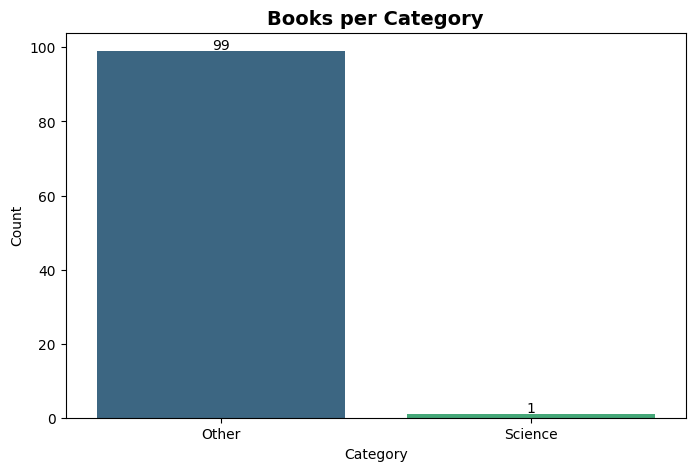

In [7]:
# Question 3: Category with Most Books
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(data=category_counts, x='Category', y='Count', palette='viridis')
plt.title('Books per Category', fontsize=14, weight='bold')
for index, row in category_counts.iterrows():
    plt.text(index, row['Count']+0.5, row['Count'], ha='center')
plt.show()

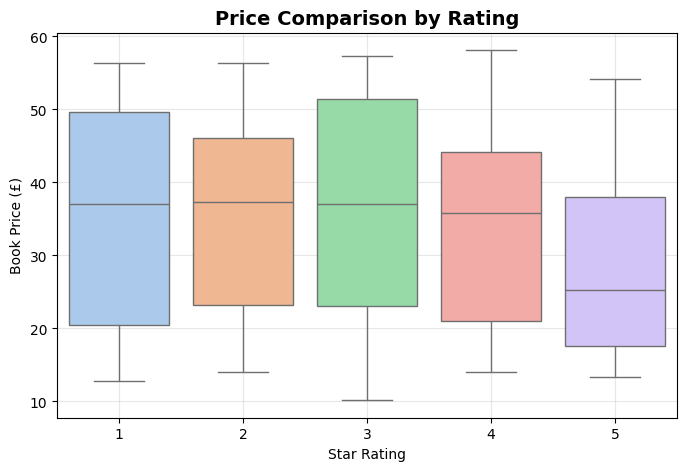

In [8]:
# Question 4: Price Comparison by Rating
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Rating', y='Price', hue='Rating', palette='pastel', legend=False)
plt.title('Price Comparison by Rating', fontsize=14, weight='bold')
plt.xlabel('Star Rating')
plt.ylabel('Book Price (£)')
plt.grid(alpha=0.3)
plt.show()
